<a href="https://colab.research.google.com/github/Akshay1781/Innomatics_Hackathon_assesment/blob/main/Innomatics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from google.colab import files
upload = files.upload()

Saving data_2_var.csv to data_2_var (2).csv


In [80]:
df = pd.read_csv("data_2_var.csv", header=None)

In [81]:
df

,0,1
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1106,-115.366669,121.000000
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


In [82]:
# numbers of rows and columns in the Datasets
df.shape

(1111, 2)

In [83]:
# Top 5 observations from the datasets
df.head()

,0,1
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [84]:
# last 5 observations from the datasets
df.tail()

,0,1
1106,-115.366669,121.000000
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885
1110,-110.344221,123.087950


In [85]:
# Chech details about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1111 non-null   float64
 1   1       1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [86]:
#Looking for the Descriptions of the datasets to get the insight of the data
df.describe()

,0,1
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


# Preprocessing the datasets

In [87]:
# Numbers of null values in the datasets
df.isnull().sum()

0    0
1    0
dtype: int64

In [88]:
# To find the duplicate data in the data
df[df.duplicated()]

,0,1
106,-63.366669,-33.0
464,112.633331,103.0
715,-31.366669,-49.0
819,-117.366669,-75.0
865,-131.366669,-125.0
900,20.633331,-95.0
908,12.633331,-95.0
920,2.633331,-95.0
924,3.633331,-95.0
932,6.633331,-95.0


In [89]:
# Length of the Duplicate Date in the datasets
value = len(df[df.duplicated()])
print("The number of duplicate data present in our data is", value)

The number of duplicate data present in our data is 21


In [90]:
# Remove the duplicate data from the datasets
df.drop_duplicates(keep = False, inplace = True)

In [91]:
len(df[df.duplicated()])

0

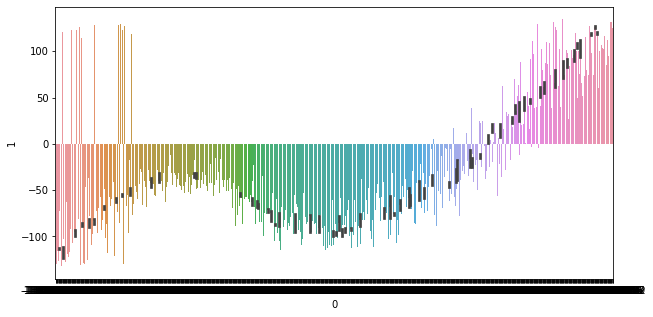

In [92]:
plt.figure(figsize = (10,5))
sns.barplot(data =df, x = 0,y = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


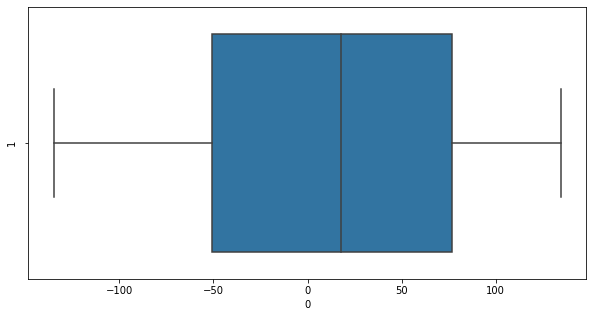

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(df[0])
plt.ylabel(1)
plt.show()

There is no Outliers present in the 1st Columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


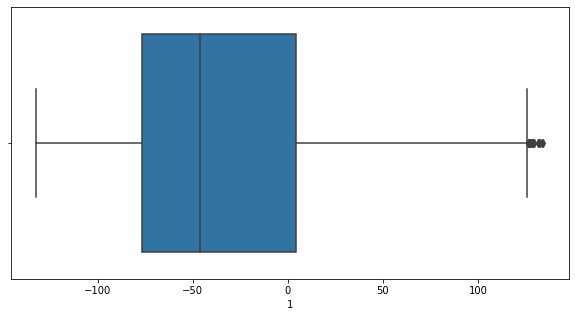

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(df[1])
plt.show()

There are some outliers present in the 2nd Column as shown in above plot

#Heatmap

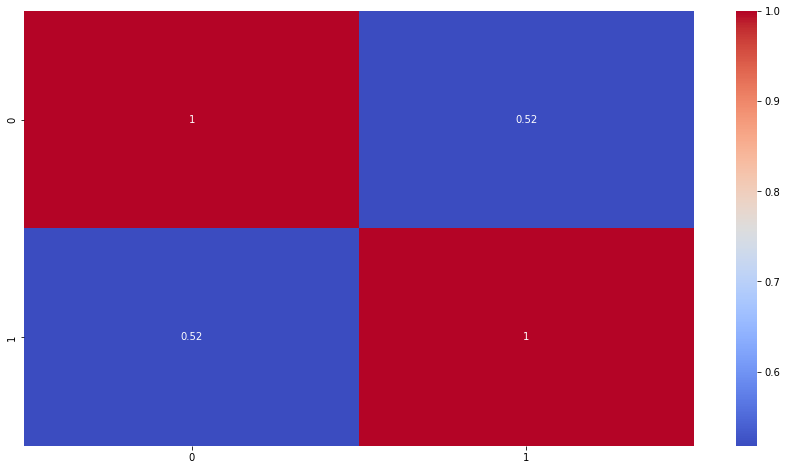

In [95]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Model Training

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### TRAIN TEST SPLIT

In [97]:
# Assign the value of X and y
X = df.iloc[:,0]
y = df.iloc[:,1]


In [98]:
# top 5 observations of independent Variables
X.head()

0   -122.740667
1   -121.531419
2   -134.917019
3   -120.605951
4   -129.894781
Name: 0, dtype: float64

In [99]:
# top 5 observations of Dependent Variables
y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: 1, dtype: float64

In [100]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [101]:
X_train.shape, X_test.shape

((860,), (216,))

##Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [118]:
#Chech the coefficient
regressor.coef_

array([0.44692062])

In [119]:
# Check the Intercept
regressor.intercept_

-31.442823186714012

In [122]:
y_pred_train = regressor.predict(X_train.values.reshape(-1,1))


In [123]:
y_pred_train

array([ 5.01753833e+00, -1.65656695e+01, -4.18858692e+01, -2.27784966e+01,
       -4.05451073e+01,  4.22450762e+00, -1.50718555e+01, -4.03422241e+00,
       -1.32829497e+01, -6.55666624e+01,  3.56133436e+00, -3.06521058e+01,
       -6.24254654e+01,  2.18760972e+00,  5.69508949e+00, -5.36823942e+01,
       -2.62436476e+01, -2.99637776e+01, -1.30760574e+01,  1.88656792e+01,
        2.64520208e+01, -8.96597094e+01, -3.25897610e+01,  2.49843863e+01,
       -2.86571841e+01,  1.94876236e+01, -8.61310104e+01, -4.89313442e+01,
       -2.96189582e+01,  1.50765972e+01, -2.13275208e+01, -4.21668713e+01,
        2.43872959e-01, -5.89783200e+01,  1.24489222e+01,  4.27269935e+00,
       -3.69885095e+01, -1.20357474e+01, -3.22251747e-01,  1.97624093e+01,
       -9.10471371e+01, -4.04966143e+01, -5.93157733e+01, -4.11590170e+01,
       -1.11868039e+01, -4.10264697e+00, -3.59267876e+01, -6.81505614e+01,
        1.85751816e+01, -6.15134252e+00, -4.13780202e+01, -3.22251747e-01,
        9.06308123e+00,  

In [124]:
y_train

284     -25.074661
942     -79.683868
178     -66.000000
221     -87.662193
695     -62.000000
           ...    
1012     12.000000
396      -7.000000
944     -93.000000
274     -48.000000
479     127.000000
Name: 1, Length: 860, dtype: float64

In [130]:
y_pred_test = regressor.predict(X_test.values.reshape(-1,1))

In [131]:
y_pred_test

array([  9.60643528, -20.43367955,   4.59387505,  13.10901386,
        28.65154468,  22.47069976,   6.83900466,  -3.47403073,
         5.14907673,  -8.09242664,  25.12466178,   8.00067506,
       -16.81961775,  26.75333164, -31.84791733,   5.95496993,
       -75.14576576,  13.97920802, -32.11097542,   6.14153242,
         0.75410555,   9.03778151, -78.35206212, -47.22510083,
        19.34225543, -48.96759129,   6.53269326, -11.04106468,
       -43.87690144,   1.39775831,  13.10762777, -47.44835931,
       -26.32993235, -25.35377372, -39.56975591, -33.10179261,
       -18.08899273, -47.00543651, -10.55628693,  -1.03904074,
        16.82104358,  -8.50518486, -36.07590117, -79.8741217 ,
       -11.80269208,  18.89533482,  18.69743332, -17.75215584,
       -87.08608601, -12.77056422, -81.50619875, -14.1767909 ,
       -40.09818673,  -4.56323223,  21.57685852,  27.51028779,
        18.68637534, -52.86160517,  18.67403568, -14.23464017,
        18.00149358, -40.74180445, -82.37729503, -90.15

##Evaluating the Score

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Calculate MSE
MSE_lr = mean_squared_error((y_train),(y_pred_train))
print('MSE:', MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE:', RMSE_lr)

#Calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#Calculate R2_score
from sklearn.metrics import r2_score
R2_lr = r2_score(y_train, y_pred_train)
print('R2_Score:', R2_lr)

MSE: 3430.739052254611
RMSE: 58.57251106325057
MAE : 44.40706968521298
R2_Score: 0.23428199440743602


Looks like our r2 score value is 0.66 that means our model is not able to capture most of the data variance

In [132]:
from sklearn.metrics import mean_squared_error
#CAlculate MSE
MSE_lr = mean_squared_error(y_test, y_pred_test)
print("MSE:", MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print('RMSE:', RMSE_lr)

#Calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#Calculate R2_score
R2_score = r2_score(y_test, y_pred_test)
print('R2_score:', R2_score)

MSE: 3108.2993404738663
RMSE: 55.75212408934628
MAE : 45.34017653611249
R2_score: 0.38681177380239573


The r2_score for the test set is 0.667 This means our linear model is not performing well on the data

##Random Forest

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train.values.reshape(-1,1), y_train)

RandomForestRegressor()

In [143]:
# Making predictions on train and test data
y_pred_train_rf = rf.predict(X_train.values.reshape(-1,1))


In [145]:
y_pred_test_rf = rf.predict(X_test.values.reshape(-1,1))

In [147]:
from sklearn.metrics import mean_squared_error
print('Model Score:', rf.score(X_train.values.reshape(-1,1), y_train))

#Calculate MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_rf)
print('MSE:', MSE_rf)

# Calculate RMSE
RMSE_rf = np.sqrt(MSE_rf)
print('RMSE:', RMSE_rf)

# Calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf)

#Calculate R2_Score
from sklearn.metrics import r2_score
r2_rf = r2_score(y_train, y_pred_train_rf)
print('R2_score:', r2_rf)

Model Score: 0.93689763539278
MSE: 282.72516117740514
RMSE: 16.814433120905537
MAE : 10.054578825637927
R2_score: 0.93689763539278


Looks like our r2 score value is 0.93 that means our model is able to capture most of the data variance.

In [148]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)


from sklearn.metrics import r2_score
#calculate R2_score
r2_rf= r2_score((y_test), (y_pred_test_rf))
print("R2_Score :",r2_rf)

MSE : 1654.6938476535029
RMSE : 40.67792826157083
MAE : 25.738365310278613
R2_Score : 0.6735710836691627


The r2_score for the test set is 0.67. This means our linear model is performing well on the data.

##ELASTIC NET REGRESSION

In [149]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [151]:
#FIT THE MODEL
elasticnet.fit(X_train.values.reshape(-1,1), y_train)

ElasticNet(alpha=0.1)

In [153]:
#check the score
elasticnet.score(X_train.values.reshape(-1,1), y_train)

0.23595337391301563

In [155]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train.values.reshape(-1,1))
y_pred_test_en=elasticnet.predict(X_test.values.reshape(-1,1))

In [156]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)

MSE : 3423.2505683753634
RMSE : 58.50855124146695
MAE : 44.36835672601774
R2 : 0.23595337391301563


Looks like our r2 score value is 0.23 that means our model is not able to capture most of the data variance.

In [157]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

MSE : 3174.791292688883
RMSE : 56.34528633957665
MAE : 45.857551663849414
R2 : 0.3736946065771418


The r2_score for the test set is 0.57. This means our linear model is not performing well on the data. 

##Conclusion

1. During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable. Next we analysed both columns and dropped the dublicate data from the datasets. We also found out the correlation, distribution and their relationship with the dependent variable.

2. We implemented 3 Machine Learning algorithm LinearRegression, RandomForest, ElasticNet.

3. Random Forest gives the highest R2 Score of 93% for training set and 67% for testing set.